# Module 5 Unit 2
## Improving neural networks with regularisation

### Regression problem


In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

## Highway accidents


In [2]:
# Import data
df = pd.read_csv('Highway.txt', delimiter = " ")

In [3]:
# Explore the size of the data set
df.shape

(39, 12)

In [4]:
# Explore the type of data and feature names
df.sample(10, random_state=0)

,lgRate,lgADT,lgTrks,Lane,Acpt,lgSigs,Itg,Slim,lgLen,Lwid,Shld,Hwy
4,0.687061,4.807355,3.584963,4,2.2,-4.322649,0.65,70,4.322649,12,10,Principal
28,2.903038,3.584963,2.807355,2,30.2,-2.500993,0.09,45,3.528571,12,3,Other
29,1.361768,3.169925,3.000000,2,10.3,-3.472488,0.00,60,3.472488,12,7,Other
33,0.879706,2.321928,3.584963,2,14.0,-2.760271,0.00,55,4.393004,10,8,Other
34,1.918386,1.000000,3.321928,2,11.3,-3.702396,0.04,55,4.763412,12,3,Other
25,3.104337,3.700440,2.584963,2,17.3,0.309872,0.31,45,1.691534,12,2,Other
10,2.070389,4.523562,2.584963,4,5.4,0.994397,0.29,60,2.813525,12,10,Major
22,1.500802,2.321928,3.169925,2,11.1,-2.491703,0.00,50,3.509696,12,8,Major
11,2.204767,4.321928,3.169925,4,11.2,0.362106,0.15,50,3.731183,12,2,Major
27,1.550901,3.321928,3.321928,2,18.0,-2.842736,0.00,55,3.848998,12,6,Other


In [5]:
# Split data into features (X) and responses (y)
X = df.iloc[:, 1:11] 
y = df.loc[:,"lgRate"]

In [6]:
X.head()

,lgADT,lgTrks,Lane,Acpt,lgSigs,Itg,Slim,lgLen,Lwid,Shld
0,6.108524,3.000000,8,4.6,-2.319040,1.20,55,2.319040,12,10
1,6.189825,3.000000,4,4.4,-4.009885,1.43,60,4.009885,12,10
2,5.614710,3.321928,4,4.7,-3.285402,1.54,60,3.285402,12,10
3,5.930737,3.700440,6,3.8,-3.412782,0.94,65,3.412782,12,10
4,4.807355,3.584963,4,2.2,-4.322649,0.65,70,4.322649,12,10


In [7]:
y.head()

0    2.195348
1    1.516015
2    1.594549
3    1.195348
4    0.687061
Name: lgRate, dtype: float64

In [8]:
# Change the array shape of the output from a dataframe single column vector
# to a contiguous flattened array
y = np.ravel(y)

In [11]:
# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
# Scale the data
scaler = StandardScaler()  

# Remember to fit using only the training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  

# Apply the same transformation to the test data
X_test = scaler.transform(X_test)

In [13]:
# Fit and check MSE before regularisation
reg = MLPRegressor(max_iter=3000, hidden_layer_sizes=(5,5), random_state=1) 
reg.fit(X_train, y_train)

# Predict
y_pred = reg.predict(X_test)

# MSE before regularisation
mean_squared_error(y_pred, y_test)

0.5428594220140155

The regularisation parameter is used to "apply the brakes". A sequence of numbers that are exponentially decaying is created to account for the complexity near 0. A larger value represents a simpler problem complexity. 

 alpha  |  Sq.Error
0.04979 |  0.943812
0.08208 |  0.900985
0.13534 |  0.837286
0.22313 |  0.734059
0.36788 |  0.497314
0.60653 |  0.378430
1.00000 |  0.304295
1.64872 |  0.271792
2.71828 |  0.254646
4.48169 |  0.238763
7.38906 |  0.271952
12.18249 |  0.437175
20.08554 |  0.498687
33.11545 |  0.510189
54.59815 |  0.516371
90.01713 |  0.522172


Text(0, 0.5, 'Mean Sq Error')

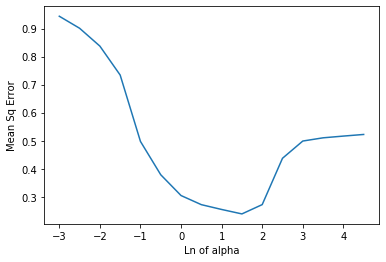

In [14]:
# Find the optimum regularisation parameter
reg_par = [np.e**n for n in np.arange(-3,5,0.5)]

# Optimise the neural network regularisation
validation_scores = {}
print(" alpha  |  Sq.Error")   
for param in reg_par:
    reg = MLPRegressor(max_iter=6000, hidden_layer_sizes=(5,5), 
                       alpha=param, random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, 
                            cv=3, scoring="neg_mean_squared_error")
    validation_scores[param] = -score.mean()
    print("%0.5f |  %0.6f" % (param, -score.mean()))   

# Plot the error function    
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()))
plt.xlabel("Ln of alpha")
plt.ylabel("Mean Sq Error")


In [15]:
# Find the regularisation parameter with the lowest error
print("The lowest cross validation error is %f" % min(validation_scores.values()))        
print("This corresponds to regularisation parameter e**%s" % 
      ([np.log(name) for name, score in validation_scores.items()
                         if score==min(validation_scores.values())][0]))

The lowest cross validation error is 0.238763
This corresponds to regularisation parameter e**1.5


The regularisation parameter found via cross-validation is $e^{1.5}$. This means that the task is relatively simple.

In [16]:
# Fit the data with the best parameter
reg = MLPRegressor(max_iter=6000, hidden_layer_sizes=(5,5), 
                   alpha=np.e**(-1.5), random_state=1)
reg.fit(X_train, y_train)
# Does not fully converge without changing max_iter

MLPRegressor(activation='relu', alpha=0.22313016014842985, batch_size='auto',
             beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=6000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [17]:
# Predict
y_pred = reg.predict(X_test)

# MSE final
mean_squared_error(y_pred, y_test)

0.4444875332669106

Notice the decrease in error before and after regularisation.

For production purposes, you would then use a regressor fitted on the entire data set (X,y), not just the test data.

In [ ]:
# Visualise by drawing a response function
# Observe each of the predictors individually vs lgRate

for variable in X.columns:
    # Copy the dataframe, so as not to change the original, and obtain medians
    X_design = X.copy()
    X_design_vec = pd.DataFrame(X_design.median()).transpose()

    # Grab the min and max of desired variable and set up a sequence
    min_res = min(X.loc[:, variable])
    max_res = max(X.loc[:, variable])
    seq = np.linspace(start=min_res, stop=max_res, num=50)

    # Set up a list of moving resultants
    to_predict = []
    for result in seq:
        X_design_vec.loc[0, variable] = result
        to_predict.append(X_design_vec.copy())

    # Convert back to DataFrame
    to_predict = pd.concat(to_predict)

    # Scale and predict
    to_predict = scaler.transform(to_predict)
    predictions = reg.predict(to_predict)

    # Plot 
    plt.plot(seq, predictions)
    plt.xlabel(variable)
    plt.ylabel("lgRate")
    plt.title("lgRate vs. " + variable)
    plt.show()

## Practice

Find the optimum regularisation parameter if `hidden_layer_sizes = (8,3)`.

 alpha  |  Sq.Error
0.04979 |  0.511397
0.08208 |  0.484542
0.13534 |  0.467532
0.22313 |  0.416223
0.36788 |  0.397518
0.60653 |  0.319572
1.00000 |  0.256146
1.64872 |  0.218676
2.71828 |  0.206764
4.48169 |  0.276141
7.38906 |  0.440793
12.18249 |  0.470698
20.08554 |  0.469335
33.11545 |  0.466729
54.59815 |  0.464250
90.01713 |  0.463838
148.41316 |  0.465099
244.69193 |  0.467566
403.42879 |  0.470332
665.14163 |  0.472757
1096.63316 |  0.474592
1808.04241 |  0.475892
The lowest cross validation error is 0.206764
This corresponds to regularisation parameter e**1.0


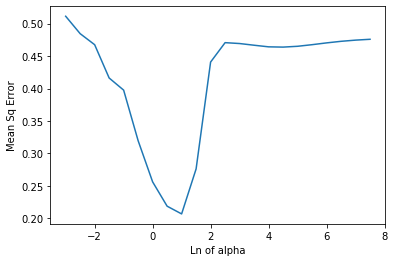

In [18]:
# Find optimum regularisation parameter
# Hint: Change the range in the following line of code.
# reg_par = [np.e**n for n in np.arange(?,?,?)]

# YOUR CODE HERE
reg_par = [np.e**n for n in np.arange(-3,8,0.5)]

# Optimise neural network regularisation
validation_scores = {}
print(" alpha  |  Sq.Error")   
for param in reg_par:
    reg = MLPRegressor(max_iter=6000, hidden_layer_sizes=(8,3), 
                       alpha=param, random_state=1)
    score = cross_val_score(estimator=reg, X=X_train, y=y_train, 
                            cv=3, scoring="neg_mean_squared_error")
    validation_scores[param] = -score.mean()
    print("%0.5f |  %0.6f" % (param, -score.mean())) 
    
# Plot the error function    
plt.plot([np.log(i) for i in validation_scores.keys()], list(validation_scores.values()))
plt.xlabel("Ln of alpha")
plt.ylabel("Mean Sq Error")

# Find the regularisation parameter with the lowest error
print("The lowest cross validation error is %f" % min(validation_scores.values()))        
print("This corresponds to regularisation parameter e**%s" % 
      ([np.log(name) for name, score in validation_scores.items()
                         if score==min(validation_scores.values())][0]))